## Check correlation between variables

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


In [18]:
data=pd.read_csv("fuel_ferc1.csv")

In [19]:
data.head(2)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
record_id                       29523 non-null object
utility_id_ferc1                29523 non-null int64
report_year                     29523 non-null int64
plant_name_ferc1                29523 non-null object
fuel_type_code_pudl             29523 non-null object
fuel_unit                       29343 non-null object
fuel_qty_burned                 29523 non-null float64
fuel_mmbtu_per_unit             29523 non-null float64
fuel_cost_per_unit_burned       29523 non-null float64
fuel_cost_per_unit_delivered    29523 non-null float64
fuel_cost_per_mmbtu             29523 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


<h2>Continuous numerical variables:</h2> 

<p>Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.</p>

In [21]:
data[['fuel_qty_burned','fuel_cost_per_unit_burned','fuel_cost_per_unit_delivered']].corr()

,fuel_qty_burned,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered
fuel_qty_burned,1.000000,-0.018535,-0.003551
fuel_cost_per_unit_burned,-0.018535,1.000000,0.011007
fuel_cost_per_unit_delivered,-0.003551,0.011007,1.000000


(0, 146542.70303166314)

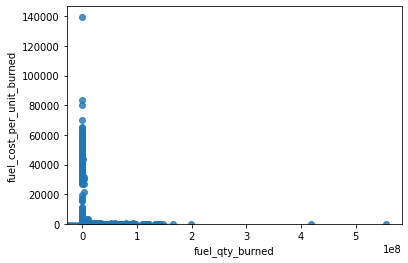

In [22]:
# Engine size as potential predictor variable of price
sns.regplot(x="fuel_qty_burned", y="fuel_cost_per_unit_burned", data=data)
plt.ylim(0,)

In [23]:
data[["fuel_qty_burned", "fuel_cost_per_unit_delivered"]].corr()

,fuel_qty_burned,fuel_cost_per_unit_delivered
fuel_qty_burned,1.000000,-0.003551
fuel_cost_per_unit_delivered,-0.003551,1.000000


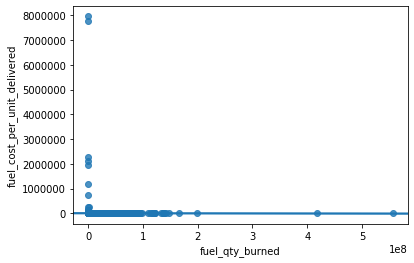

In [24]:
sns.regplot(x="fuel_qty_burned", y="fuel_cost_per_unit_delivered", data=data)

<h3>Categorical variables</h3>

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>

In [38]:
data1=data[data["fuel_cost_per_unit_delivered"]<50]
data1=data1[data1["fuel_cost_per_unit_delivered"]>-50]

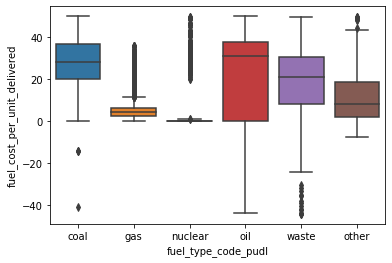

In [39]:
sns.boxplot(x="fuel_type_code_pudl", y="fuel_cost_per_unit_delivered", data=data1)

<h2 id="correlation_causation">3. Correlation and Causation</h2>

<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>

<p3>Pearson Correlation</p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>

<p>Pearson Correlation is the default method of the function "corr".  Like before we can calculate the Pearson Correlation of the of the 'int64' or 'float64'  variables.</p>

In [40]:
data.corr()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


 sometimes we would like to know the significant of the correlation estimate. 

<b>P-value</b>: 
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

 We can obtain this information using  "stats" module in the "scipy"  library.

In [41]:
from scipy import stats

In [42]:
pearson_coef, p_value = stats.pearsonr(data['fuel_qty_burned'], data['fuel_cost_per_unit_burned'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.01853541679482522  with a P-value of P = 0.0014478305969085916


<h5>Conclusion:</h5>
<p>Since the p-value is $>$ 0.001, the correlation between fuel_qty_burned and fuel_cost_per_unit_burned is not statistically significant, although the linear relationship isn't extremely strong (~-0.01)</p>

<h2 id="anova">4. ANOVA</h2>

<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.</p>

<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.</p>

we can use the function 'f_oneway' in the module 'stats'  to obtain the <b>F-test score</b> and <b>P-value</b>.

In [44]:
grouped_test2=data[['fuel_type_code_pudl', 'fuel_cost_per_unit_burned']].groupby(['fuel_type_code_pudl'])
grouped_test2.head(2)

,fuel_type_code_pudl,fuel_cost_per_unit_burned
0,coal,18.590
1,coal,18.580
4,gas,2.770
6,nuclear,28.770
10,gas,1.940
14,oil,32.130
19,oil,33.321
45,nuclear,40803.000
49,waste,34.180
84,other,14.685


In [45]:
grouped_test2.get_group('coal')['fuel_cost_per_unit_burned']

0        18.590
1        18.580
2        39.720
3        47.210
5        44.240
          ...  
29503    26.775
29510    14.760
29516    14.760
29517    13.690
29521     3.060
Name: fuel_cost_per_unit_burned, Length: 8547, dtype: float64

In [48]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('coal')['fuel_cost_per_unit_burned'], grouped_test2.get_group('gas')['fuel_cost_per_unit_burned'], grouped_test2.get_group('oil')['fuel_cost_per_unit_burned'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 29.52854680656399 , P = 1.546589711731313e-13


F=29 means not that not highly correlated and P~=0 mean it is significant